In [9]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/kaggle/input/brain-tumor-classification-mri/Training/"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

# Data Visualization 

In [11]:
import plotly.express as px
classes_info = {}
classes = sorted(os.listdir(DATADIR))
for name in classes:
    classes_info[name] = len(os.listdir(DATADIR + f'/{name}'))
print(classes_info)
fig = px.pie(names=classes_info.keys(),values=classes_info.values(),hole=0.05,title='CLasses Info')
fig.update_layout({'title':{"x":0.1}})
fig.show()

{'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}


In [12]:
glimoa_train = os.listdir("../input/brain-tumor-classification-mri/Training/glioma_tumor")
men_train =  os.listdir("../input/brain-tumor-classification-mri/Training/meningioma_tumor")
notumor_train = os.listdir("../input/brain-tumor-classification-mri/Training/no_tumor")
pit_train =  os.listdir("../input/brain-tumor-classification-mri/Training/pituitary_tumor")

In [13]:
import seaborn as sns

<AxesSubplot:>

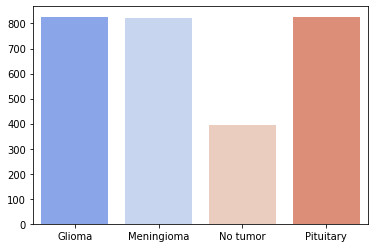

In [14]:
#picture in the  dataset
labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
values = [len(glimoa_train), len(men_train), len(notumor_train), len(pit_train)]
sns.barplot(x = labels, y = values, palette="coolwarm")

# MANIPULATING DATA

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [16]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)

(2870, 150, 150)


In [17]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y = to_categorical(y, num_classes = 4)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


# PREDICTION USING CNN

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop ,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Activation

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [21]:
model1 =Sequential()
#4 Convolution layers and 2 Max Pooling layers
model1.add(Conv2D(filters=32,kernel_size=5,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=32,kernel_size=4,input_shape=(150,150,1)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))

model1.add(Conv2D(filters=25,kernel_size=3,input_shape=(100,100,1)))
model1.add(Activation('relu'))

model1.add(Conv2D(filters=25,kernel_size=2,input_shape=(50,50,3)))
model1.add(Activation('relu'))

model1.add(MaxPool2D(pool_size=3))
model1.add(Flatten())
model1.add(Dense(250))
model1.add(Activation('relu'))
model1.add(Dense(4))
model1.add(Activation('sigmoid'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs= 10


2023-02-08 00:32:35.191713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 00:32:35.192775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 00:32:35.197114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 00:32:35.197973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 00:32:35.198759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [22]:
from keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [23]:
history1 = model1.fit(X_train,Y_train,epochs=5,validation_data=(X_val,Y_val),callbacks=[early_stop])

2023-02-08 00:32:40.259664: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2023-02-08 00:32:42.208930: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - 14s 53ms/step - loss: 0.9891 - accuracy: 0.5767 - val_loss: 0.7828 - val_accuracy: 0.6655
Epoch 2/5
72/72 [==============================] - 3s 39ms/step - loss: 0.6276 - accuracy: 0.7530 - val_loss: 0.5977 - val_accuracy: 0.7700
Epoch 3/5
72/72 [==============================] - 3s 39ms/step - loss: 0.4280 - accuracy: 0.8367 - val_loss: 0.5199 - val_accuracy: 0.8031
Epoch 4/5
72/72 [==============================] - 3s 40ms/step - loss: 0.3271 - accuracy: 0.8733 - val_loss: 0.4022 - val_accuracy: 0.8380
Epoch 5/5
72/72 [==============================] - 3s 39ms/step - loss: 0.2313 - accuracy: 0.9125 - val_loss: 0.4222 - val_accuracy: 0.8519


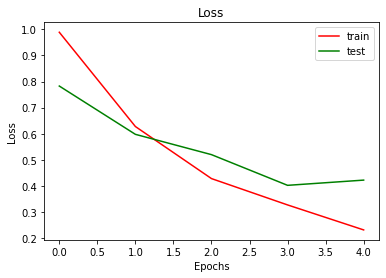

In [24]:
plt.plot(history1.history["loss"],c = "red")
plt.plot(history1.history["val_loss"],c = "green")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

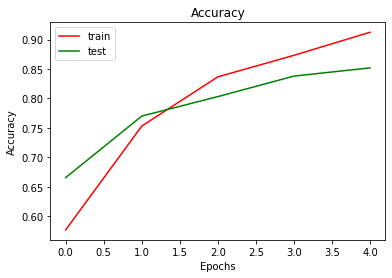

In [25]:
plt.plot(history1.history["accuracy"],c = "red")
plt.plot(history1.history["val_accuracy"],c = "green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [26]:

model2 = Sequential()
# 4 Convolution layers and 5 max pooling layers
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 15  
batch_size = 40



/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [27]:
datagen.fit(X_train)
history2 = model2.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size) 

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/15
57/57 [==============================] - 7s 95ms/step - loss: 1.2038 - accuracy: 0.4517 - val_loss: 1.0688 - val_accuracy: 0.5314
Epoch 2/15
57/57 [==============================] - 4s 61ms/step - loss: 0.9038 - accuracy: 0.6237 - val_loss: 0.9704 - val_accuracy: 0.5610
Epoch 3/15
57/57 [==============================] - 3s 61ms/step - loss: 0.7658 - accuracy: 0.6689 - val_loss: 0.8437 - val_accuracy: 0.6254
Epoch 4/15
57/57 [==============================] - 3s 61ms/step - loss: 0.6991 - accuracy: 0.7017 - val_loss: 0.7610 - val_accuracy: 0.6446
Epoch 5/15
57/57 [==============================] - 4s 62ms/step - loss: 0.6300 - accuracy: 0.7380 - val_loss: 0.7758 - val_accuracy: 0.6341
Epoch 6/15
57/57 [==============================] - 3s 61ms/step - loss: 0.6038 - accuracy: 0.7425 - val_loss: 0.6796 - val_accuracy: 0.6986
Epoch 7/15
57/57 [==============================] - 4s 61ms/step - loss: 0.5291 - accuracy: 0.7801 - val_loss: 0.8082 - val_accuracy: 0.6220
Epoch 8/15
57

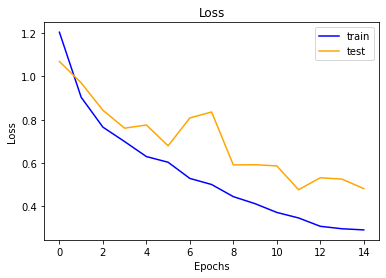

In [28]:
plt.plot(history2.history["loss"],c = "blue")
plt.plot(history2.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

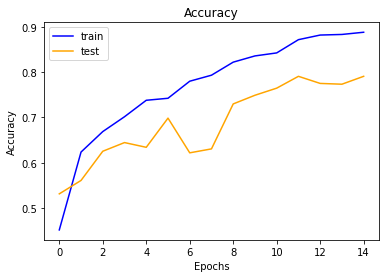

In [29]:
plt.plot(history2.history["accuracy"],c = "blue")
plt.plot(history2.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [30]:

model = Sequential()
# 5 Convolution layers conv. & 5 Max Pooling layers
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50  
batch_size = 40
 


In [31]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)    

Epoch 1/50
57/57 [==============================] - 6s 84ms/step - loss: 1.2699 - accuracy: 0.4082 - val_loss: 1.0859 - val_accuracy: 0.5610
Epoch 2/50
57/57 [==============================] - 4s 72ms/step - loss: 0.9429 - accuracy: 0.5961 - val_loss: 0.7952 - val_accuracy: 0.6498
Epoch 3/50
57/57 [==============================] - 4s 70ms/step - loss: 0.7572 - accuracy: 0.6627 - val_loss: 0.7539 - val_accuracy: 0.6638
Epoch 4/50
57/57 [==============================] - 4s 70ms/step - loss: 0.6953 - accuracy: 0.7083 - val_loss: 0.8871 - val_accuracy: 0.5993
Epoch 5/50
57/57 [==============================] - 4s 70ms/step - loss: 0.6463 - accuracy: 0.7243 - val_loss: 0.6680 - val_accuracy: 0.7056
Epoch 6/50
57/57 [==============================] - 4s 73ms/step - loss: 0.5998 - accuracy: 0.7438 - val_loss: 0.5903 - val_accuracy: 0.7491
Epoch 7/50
57/57 [==============================] - 4s 70ms/step - loss: 0.5911 - accuracy: 0.7531 - val_loss: 0.6209 - val_accuracy: 0.7300
Epoch 8/50
57

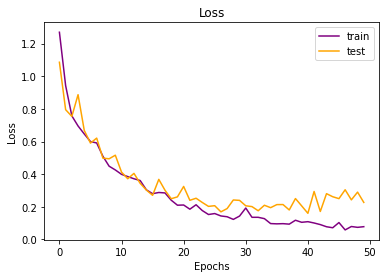

In [32]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

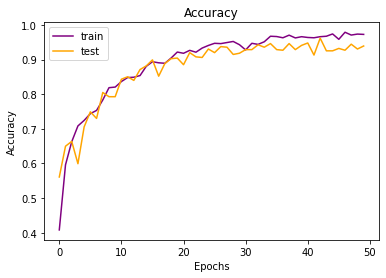

In [33]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [34]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix

In [35]:
import seaborn as sns

Confusion Matrix


Text(70.8, 0.5, 'Predicted class')

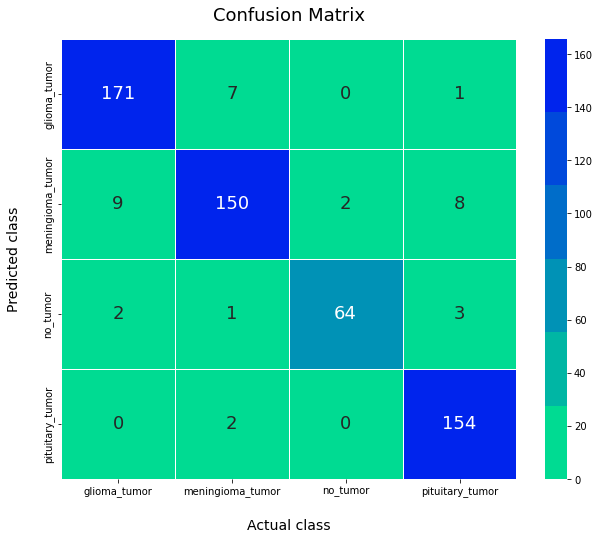

In [36]:
y_test_arg=np.argmax(Y_val,axis=1)
Y_pred = np.argmax(model.predict(X_val),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

In [37]:
predict_x=model.predict(X_val) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 3, 3,
       1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 0, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 3,
       3, 3, 3, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 3, 1, 1, 3, 0, 3, 1,
       1, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 3, 0, 3, 1, 1, 1, 3, 3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 3, 2, 1, 1, 0, 1, 2, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 1, 1, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 3, 3, 3, 2, 1, 1, 0, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 2, 3, 0,
       3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1, 1, 3, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 3, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 1, 1, 0, 0, 0, 1, 0, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3,
       2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 2, 1, 3, 3, 3,

In [38]:
Y_val2 = np.argmax(Y_val,axis=1)
Y_val2

array([0, 3, 0, 0, 3, 1, 3, 2, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 2, 1, 0, 3,
       1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 2, 0, 3, 1, 0, 2, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 1, 3, 1, 3, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 0, 2, 0, 1, 2, 0, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 1, 1, 3, 0, 3, 1,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 0, 1, 2, 0, 2, 1, 3,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 3, 2, 0,
       0, 0, 3, 1, 1, 1, 2, 0, 0, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 3, 3, 3, 2, 1, 1, 0, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 2, 3, 0,
       3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1, 1, 3, 3,
       0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 1, 1, 0, 2, 2, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3,
       2, 1, 0, 2, 1, 1, 3, 0, 1, 0, 2, 1, 3, 3, 3,

In [39]:
model.save('kaggle_model_2.h5')

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(Y_val2,classes_x,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.94      0.96      0.95       179
meningioma_tumor       0.94      0.89      0.91       169
        no_tumor       0.97      0.91      0.94        70
 pituitary_tumor       0.93      0.99      0.96       156

        accuracy                           0.94       574
       macro avg       0.94      0.94      0.94       574
    weighted avg       0.94      0.94      0.94       574

